# Setting Up
- install font
https://github.com/adobe-fonts/source-han-code-jp/releases/tag/2.000R

- LaTeX command reference 
http://www.latex-cmd.com/

# Machine Learning Online Class - Exercise 2: Logistic Regression

##  Instructions

This file contains code that helps you get started on the logistic regression exercise.  
You will need to complete the following functions in this exericse:

- sigmoid.m
- costFunction.m
- predict.m
- costFunctionReg.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams
import pandas as pd
from scipy import special, optimize
import numpy as np

# Load Data
The first two columns contains the exam scores and the third column contains the label.


In [14]:
df = pd.read_csv("./ex2data2.txt", names=['score1', 'score2', 'admitted'])
df.head()

,score1,score2,admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [15]:
X = df.as_matrix(["score1","score2"])
y = df.as_matrix(["admitted"])

print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (118, 2)
y.shape (118, 1)


# Part 1: Plotting - plotData(X, y)

We start the exercise by first plotting the data to understand the problem we are working with.

xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend('Admitted', 'Not admitted')

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


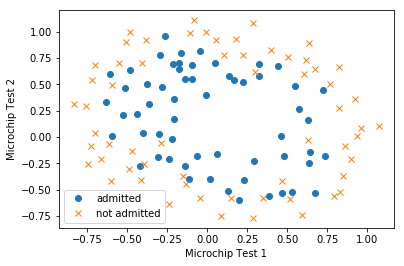

In [30]:
#   We start the exercise by first plotting the data to understand the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

def plot_data(X, y):
    #  Find Indices of Positive and Negative Examples
    pos = X[(y==1)[:, 0]] # (y==1)[:, 0]  :convert (m, 1) matrix to index array: (m, )
    neg = X[(y==0)[:,0]]

    plt.plot(pos[:, 0], pos[:, 1], "o", label=u'admitted')
    plt.plot(neg[:, 0], neg[:, 1], "x", label=u'not admitted')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()


# call this function
plot_data(X, y)

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
def map_feature(X1, X2):
    '''
    MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
        X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    Inputs X1, X2 must be the same size
    '''
    degree = 6
    out = np.ones(shape=(X1.size, 1))

    for i in range(1, degree):
        for j in  range(0, i):
            n = np.power(X1, i - j) * np.power(X2, j)
        out = np.hstack((out, n))
    return out

In [28]:
def cost_function_reg(theta, X, y, lmd):
    m = y.shape[0]
    hx = sigmoid(np.dot(X, theta))

    regularized = lmd / (2 * m) * np.dot(theta.T, theta) 

    J = (1/m) * ( - np.dot(y.T, np.log(hx)) - np.dot((1 - y).T, np.log(1 - hx))) + regularized
    return J.flatten()

def gradient_descent(theta, X, y, lmd):
    m = y.shape[0] # number of training examples
    hx = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (hx -  y)) + lmd/m * theta
    return grad.flatten() # return must be a vector , admitting to bfgc


X_m = map_feature(X[:, 0:1], X[:, 1:2])
(m, n) = X_m.shape

initial_theta = np.zeros(shape=(n, 1))
lmd = 1

cost = cost_function_reg(initial_theta, X_m, y, lmd)
grad = gradient_descent(initial_theta, X_m, y, lmd)

print('Cost at initial theta (zeros): ', cost)
print('grad: ', grad)

Cost at initial theta (zeros):  [ 0.69314718]
grad:  [ 0.00847458  0.01878809  0.01150133  0.00819244  0.00309594  0.00447629]


# Part 2: Regularization and Accuracies

Optional Exercise:
In this part, you will get to try different values of lambda 
and see how regularization affects the decision coundart
Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? 
How does the training set accuracy vary?


In [27]:
(m, n) = X_m.shape
#  Initialize fitting parameters
initial_theta = np.zeros(shape=(n, 1)) # print(initial_theta.shape) # (16, 1)

#  Set regularization parameter lambda to 1 (you should vary this)
lmd = 1

# Run fminunc to obtain the optimal theta 
cf = lambda t: cost_function_reg(t, X_m, y, lmd)
grad = lambda t: gradient_descent(t, X_m, y, lmd)

# res = optimize.minimize(cf, initial_theta, method='BFGS', jac=grad, options={'maxiter': 400})
res = optimize.minimize(cf, initial_theta,  options={'maxiter': 400})

# Print theta to screen
print('Cost at theta found by fminunc: {0}'.format(res.fun))
print('theta:', res.x)
theta = res.x
# print(res)

Cost at theta found by fminunc: 0.6876771202321366
theta: [-0.02987712 -0.16033756 -0.44740792 -0.27865103  0.1028776  -0.13501191]
      fun: 0.6876771202321366
 hess_inv: array([[  3.26662237,  -1.03963537,   1.70309516,   1.17903242,
         -2.46735239,   0.97559366],
       [ -1.03963537,  13.03569008,  -6.97859   ,  -0.50964972,
         -6.32926854,   0.52019943],
       [  1.70309516,  -6.97859   ,  30.84403764,  17.68308409,
          2.40724767,  -5.26393847],
       [  1.17903242,  -0.50964972,  17.68308409,  25.51537426,
         -9.78844645, -34.61615569],
       [ -2.46735239,  -6.32926854,   2.40724767,  -9.78844645,
         39.23201876,   0.24225792],
       [  0.97559366,   0.52019943,  -5.26393847, -34.61615569,
          0.24225792,  95.96452363]])
      jac: array([ -9.42498446e-06,  -4.03076410e-06,   1.87754631e-06,
        -6.63101673e-07,  -5.40167093e-06,   4.17232513e-07])
  message: 'Optimization terminated successfully.'
     nfev: 248
      nit: 29
     n

X_:  (50, 50)
Y_:  (50, 50)
z:  (50, 6)


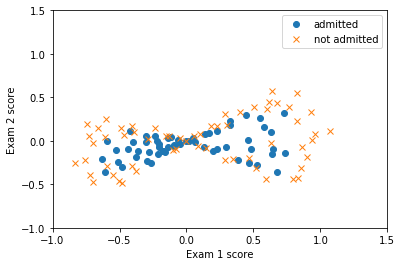

In [29]:
def plot_decision_boundary(theta, X, y):
    plot_data(X[:, (1,2)], y)
    # Here is the grid range
    u = np.linspace(-1, 1.5, num=50)
    v = np.linspace(-1, 1.5, num=50)
    X_, Y_ = np.meshgrid(u, v)    #         z = np.dot(map_feature(u[:, np.newaxis], v[:, np.newaxis]), theta_) #(6, 1)
    print("X_: ", X_.shape)
    print("Y_: ", Y_.shape)        
#     theta_ = theta[:, np.newaxis]
    z = map_feature(u[:, np.newaxis], v[:, np.newaxis])
    print("z: ", z.shape)
    plt.contour(u[:, np.newaxis], v[:, np.newaxis], z.dot(theta[:, np.newaxis]))        #  http://ailaby.com/contour/
    plt.show()

plot_decision_boundary(theta, X_m, y)

In [31]:
def predict(theta_cv, X):
    m, n = X.shape # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(shape=(m, 1))

    return sigmoid(np.dot(X, theta_cv)) >= 0.5

# Compute accuracy on our training set
p = predict(theta, X_m) 

print('Train Accuracy: {0}'.format(np.mean(p == y) * 100))

Train Accuracy: 50.21545532892847
